In [11]:
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [12]:
root = Path('res_261222/')

In [53]:
exps = list(root.glob('*.txt'))

params = []
names = []
recs = []
c=0.01
for exp in exps:
    name = str(exp).split('/')[-1].split('.')[0]
    
    while name.count('_') > 2:
        name = name[:name.index('_')] + '-' + name[name.index('_')+1:]
    line, city, date = name.split('_') #name[:name.index('_')], name[name.index('_')+1:], 
    date = date.split('-')[1] # month
    smape, epoch = open(exp).read().splitlines()
    smape = float(smape) -c
    
    names.append(f'{line}_{city}_{date}')
    
    params.append([
        # line, city, 
        float(smape), int(epoch)
    ])
    
    recs.append([line, city, date, float(smape), epoch])
    
recs = pd.DataFrame.from_records(recs, columns='line, city, date, smape, epoch'.split(', '))
    
params = np.array(params)
# params

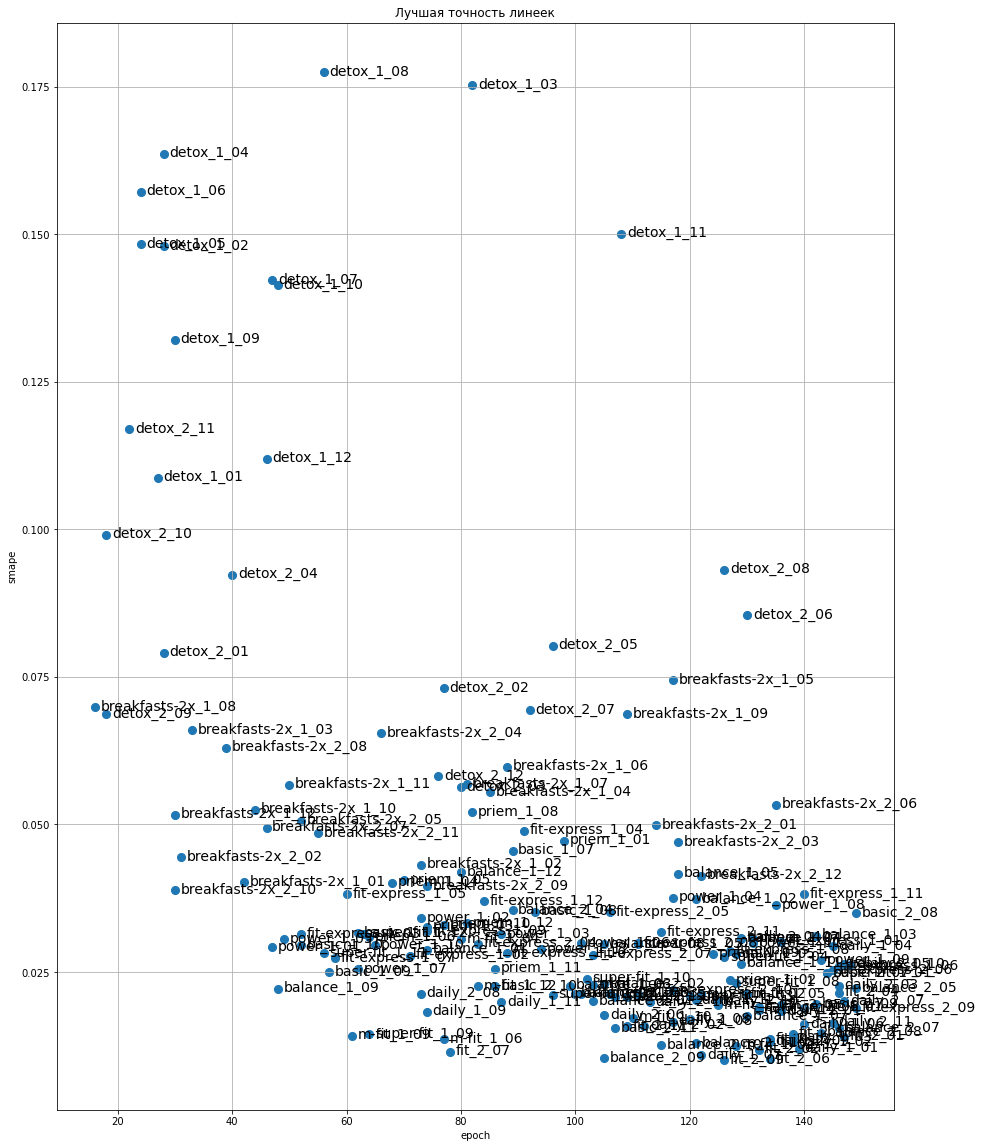

In [54]:
plt.figure(figsize=(15, 20))

plt.title('Лучшая точность линеек')
plt.grid(True)
plt.xlabel('epoch')
plt.ylabel('smape')

plt.scatter(params[:, 1], params[:, 0], s=65)

for i, name in enumerate(names):
    x, y = params[i, 1] + 1, params[i, 0] - 0.0005
    plt.text(x, y, name, fontsize=14)

plt.savefig('точности_линеек.png')
plt.show()

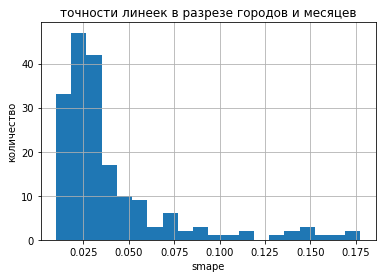

In [57]:
recs.smape.hist(bins=20)
plt.xlabel('smape')
plt.ylabel('количество')
plt.title('точности линеек в разрезе городов и месяцев')
plt.savefig('smape_hist.png')